# Convolutional Neural Network - ResNET18 fine-tuning

This notebook shows the fine-tuning process and its performance for the four categories classification of satellite images.

***Author:*** [Paulo Ribeiro](mailto:paulo.ribeirodecarvalho@epfl.ch)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive/colab/swisscom_coding_test/deep_learning/

/content/drive/MyDrive/colab/swisscom_coding_test/deep_learning


In [3]:
from warnings import filterwarnings
from cnn import ResNET
from collections import Counter
filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

## ResNET

I use here the pretrained ResNET18 from scikit-learn to fine-tune the model for my task.

In [4]:
cnn = ResNET(
    data_dir="../data/",
    img_size=(128, 128),
    test_size=0.2,
    batch_size=1024,
    epochs=10
)

Class names: ['cloudy', 'desert', 'green_area', 'water']


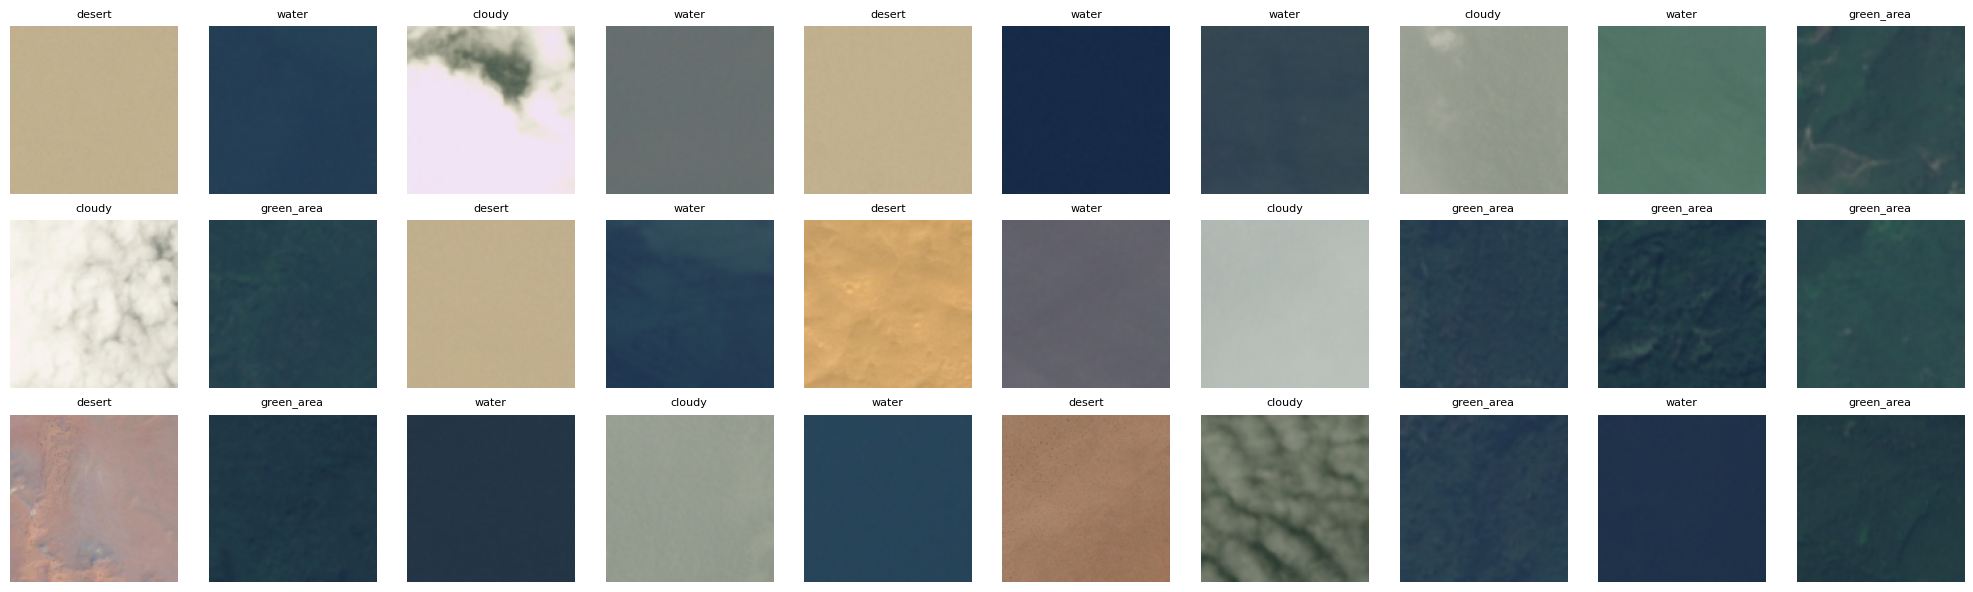

In [5]:
cnn.data_loader(show=True)

In [6]:
# Initialize a Counter to store label frequencies
label_counter = Counter()

# Iterate over the DataLoader
for inputs, labels in cnn.train_loader:
    # Count each label in the batch
    label_counter.update(labels.tolist())

# Display the counts of each label
print("Label Distribution:", label_counter)

Label Distribution: Counter({3: 1219, 0: 1204, 2: 1190, 1: 923})


In [7]:
cnn.load_model()

In [8]:
cnn.fine_tune()

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [1/10], Train Loss: 1.3492, Val Loss: 1.2974, Val F1 Score: 0.4414


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [2/10], Train Loss: 0.9520, Val Loss: 1.1353, Val F1 Score: 0.5666


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [3/10], Train Loss: 0.6943, Val Loss: 0.9117, Val F1 Score: 0.7095


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [4/10], Train Loss: 0.5210, Val Loss: 0.6529, Val F1 Score: 0.8609


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [5/10], Train Loss: 0.4048, Val Loss: 0.4770, Val F1 Score: 0.9052


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [6/10], Train Loss: 0.3304, Val Loss: 0.3643, Val F1 Score: 0.9322


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [7/10], Train Loss: 0.2783, Val Loss: 0.2955, Val F1 Score: 0.9363


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [8/10], Train Loss: 0.2448, Val Loss: 0.2478, Val F1 Score: 0.9578


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [9/10], Train Loss: 0.2184, Val Loss: 0.2138, Val F1 Score: 0.9678


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [10/10], Train Loss: 0.2003, Val Loss: 0.1914, Val F1 Score: 0.9694


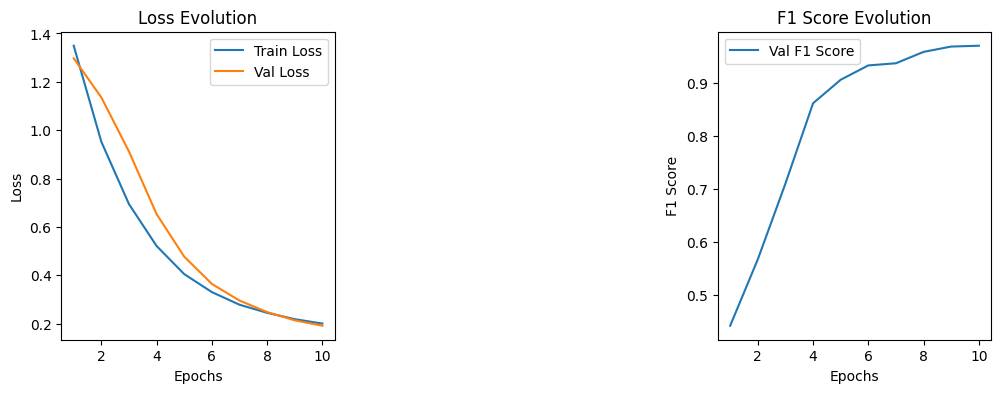

In [9]:
cnn.show_training()

  0%|          | 0/1 [00:00<?, ?it/s]

Classification Report:
               precision    recall  f1-score   support

      cloudy       0.96      0.95      0.96       111
      desert       0.99      0.98      0.98        84
  green_area       0.93      0.98      0.96       132
       water       0.96      0.91      0.94       128

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455



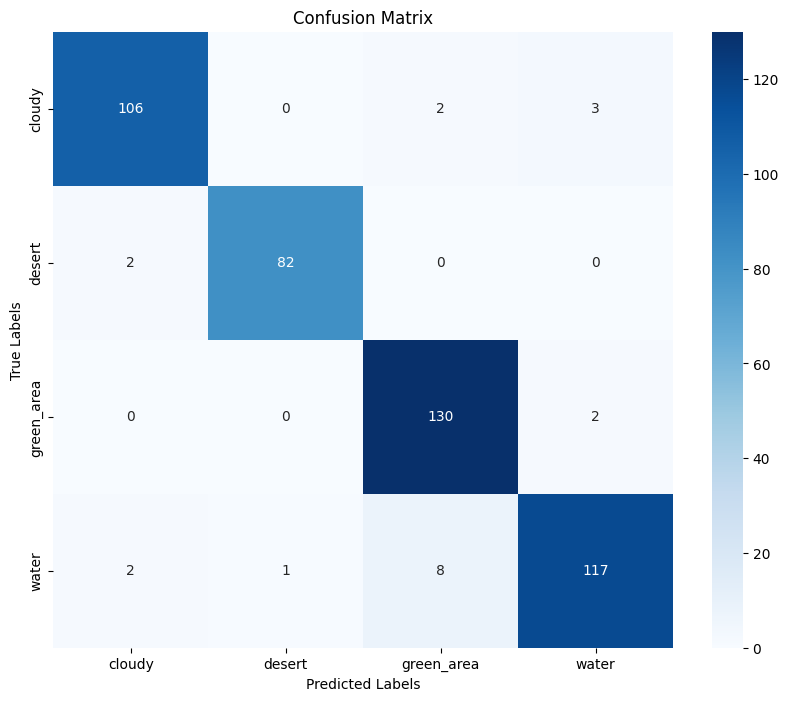

In [10]:
cnn.evaluate()